In [1]:
import os
import json
import random
from pathlib import Path
from zipfile import ZipFile

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
kaggle_data = json.load(open(str(Path.home()) + '/kaggle.json', 'r'))
KAGGLE_USERNAME = kaggle_data['username']
KAGGLE_KEY = kaggle_data['key']

In [4]:
if KAGGLE_KEY and KAGGLE_USERNAME: print('Successfully imported access to kaggle')

Successfully imported access to kaggle


In [5]:
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

In [6]:
print('Dataset will be downloaded as zip under the current directory')
!kaggle datasets download -d sveneschlbeck/beginners-regression-dataset

Dataset will be downloaded as zip under the current directory
beginners-regression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!rm -rf data/ && unzip *.zip -d ./data

Archive:  beginners-regression-dataset.zip
  inflating: ./data/apartment_prices.csv  


In [8]:
!ls data/

apartment_prices.csv


In [9]:
df = pd.read_csv('./data/apartment_prices.csv'); df.head()

,Squaremeter,Price
0,70,351
1,72,39
2,91,473
3,58,282
4,49,3


## EDA / dataviz

### First feature -> Squaremeter

In [10]:
current = df['Squaremeter']
current.min(), current.max(), current.mean(), current.median()

(11, 109, 61.9, 60.5)

array([[<AxesSubplot:title={'center':'Squaremeter'}>]], dtype=object)

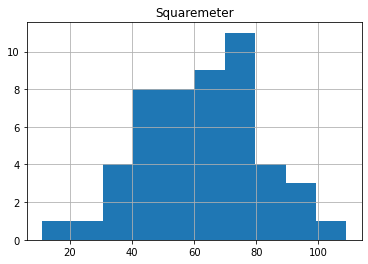

In [11]:
%matplotlib inline
df.hist(column='Squaremeter', bins=10)

In [12]:
current = df['Price']
current.min(), current.max(), current.mean(), current.median()

(3, 576, 304.1, 306.5)

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

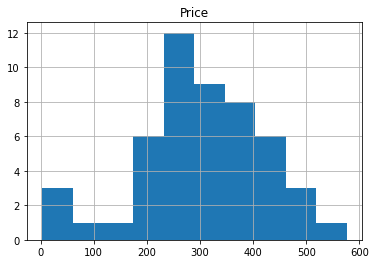

In [13]:
%matplotlib inline
df.hist(column='Price', bins=10)

## Prediction and model training evolution

In [14]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

First let's define our X and y, then separate on two set to be able to compute training metrics
- Independant variable (X) -> Squaremeter
- dependant variable (y) -> Price

### Spliting train and validation set -> 80/20

In [15]:
X, y = df['Squaremeter'].values, df['Price'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape, type(X_train), y_train.shape, type(y_train)

((40,), numpy.ndarray, (40,), numpy.ndarray)

In [18]:
X_train = X_train.reshape(-1, 1); X_train

array([[ 60],
       [ 74],
       [ 65],
       [ 60],
       [ 89],
       [ 33],
       [ 70],
       [109],
       [ 25],
       [ 50],
       [ 47],
       [ 62],
       [ 11],
       [ 55],
       [ 55],
       [ 42],
       [ 60],
       [ 61],
       [ 81],
       [ 62],
       [ 50],
       [ 70],
       [ 76],
       [ 88],
       [ 72],
       [ 35],
       [ 56],
       [ 72],
       [ 48],
       [ 52],
       [ 64],
       [ 93],
       [ 68],
       [ 51],
       [ 40],
       [ 51],
       [ 58],
       [ 70],
       [ 48],
       [ 79]])

In [19]:
X_train.shape

(40, 1)

In [20]:
y_train = y_train.reshape(-1, 1); y_train

array([[328],
       [322],
       [331],
       [282],
       [499],
       [181],
       [352],
       [576],
       [101],
       [215],
       [239],
       [287],
       [  7],
       [322],
       [294],
       [229],
       [277],
       [308],
       [397],
       [328],
       [286],
       [376],
       [407],
       [426],
       [ 39],
       [165],
       [317],
       [363],
       [228],
       [256],
       [305],
       [424],
       [383],
       [289],
       [225],
       [254],
       [282],
       [351],
       [263],
       [393]])

In [21]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

### Model instanciation and basic training

With a linear algorithm like LinearRegression

In [22]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [23]:
preds = model_linear.predict(X_test)

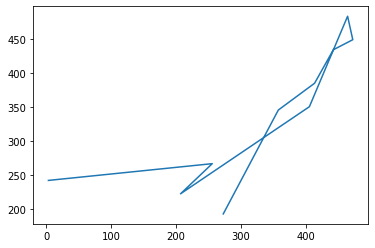

In [24]:
plt.plot(y_test, preds)

In [25]:
regression_results(y_test, preds)

explained_variance:  0.6503
mean_squared_log_error:  1.7026
r2:  0.6476
MAE:  49.3944
MSE:  6901.7369
RMSE:  83.0767


With an ensemble algorithm like RandomForest

In [26]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)

/tmp/ipykernel_17025/4236113226.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


RandomForestRegressor()

In [27]:
preds = model_forest.predict(X_test)

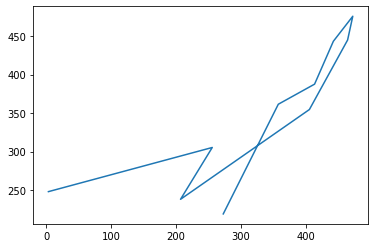

In [28]:
plt.plot(y_test, preds)

In [29]:
regression_results(y_test, preds)

explained_variance:  0.6587
mean_squared_log_error:  1.7188
r2:  0.6422
MAE:  48.372
MSE:  7007.7667
RMSE:  83.7124


## Shuffling data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
X_train = X_train.reshape(-1, 1);

In [32]:
y_train = y_train.reshape(-1, 1);

In [33]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [34]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [35]:
preds = model_linear.predict(X_test)

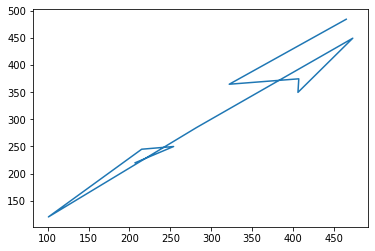

In [36]:
plt.plot(y_test, preds)

In [37]:
regression_results(y_test, preds)

explained_variance:  0.9385
mean_squared_log_error:  0.0098
r2:  0.9384
MAE:  24.2919
MSE:  840.3053
RMSE:  28.988


In [38]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)

/tmp/ipykernel_17025/4236113226.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


RandomForestRegressor()

In [39]:
preds = model_forest.predict(X_test)

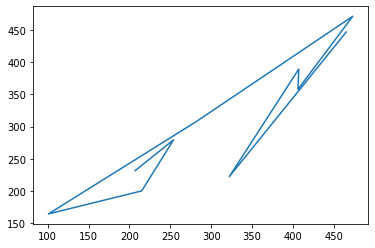

In [40]:
plt.plot(y_test, preds)

In [41]:
regression_results(y_test, preds)

explained_variance:  0.8629
mean_squared_log_error:  0.0423
r2:  0.8602
MAE:  33.9451
MSE:  1908.0463
RMSE:  43.6812


### Shuffling and loging our price

In [42]:
X, y = df['Squaremeter'].values, np.log(df['Price'].values)

In [43]:
df['Price'].values[0], '->', y[0]

(351, '->', 5.860786223465865)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
X_train = X_train.reshape(-1, 1);

In [46]:
y_train = y_train.reshape(-1, 1);

In [47]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [48]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [49]:
preds = model_linear.predict(X_test)

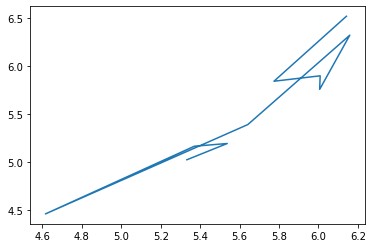

In [50]:
plt.plot(y_test, preds)

In [51]:
regression_results(y_test, preds)

explained_variance:  0.7648
mean_squared_log_error:  0.0013
r2:  0.7137
MAE:  0.2215
MSE:  0.0582
RMSE:  0.2413


In [52]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)

/tmp/ipykernel_17025/4236113226.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


RandomForestRegressor()

In [53]:
preds = model_linear.predict(X_test)

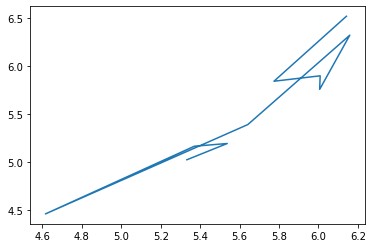

In [54]:
plt.plot(y_test, preds)

In [55]:
regression_results(y_test, preds)

explained_variance:  0.7648
mean_squared_log_error:  0.0013
r2:  0.7137
MAE:  0.2215
MSE:  0.0582
RMSE:  0.2413


### Log our price but not shuffling our dataset

In [56]:
X, y = df['Squaremeter'].values, np.log(df['Price'].values)

In [57]:
df['Price'].values[0], '->', y[0]

(351, '->', 5.860786223465865)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
X_train = X_train.reshape(-1, 1);

In [60]:
y_train = y_train.reshape(-1, 1);

In [61]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [62]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [63]:
preds = model_linear.predict(X_test)

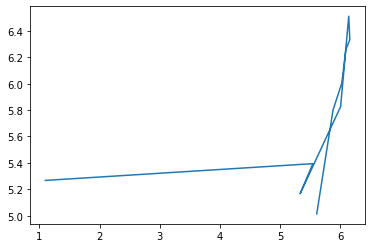

In [64]:
plt.plot(y_test, preds)

In [65]:
regression_results(y_test, preds)

explained_variance:  0.2128
mean_squared_log_error:  0.1212
r2:  0.1489
MAE:  0.6073
MSE:  1.8017
RMSE:  1.3423


In [66]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)

/tmp/ipykernel_17025/4236113226.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_forest.fit(X_train, y_train)


RandomForestRegressor()

In [67]:
preds = model_forest.predict(X_test)

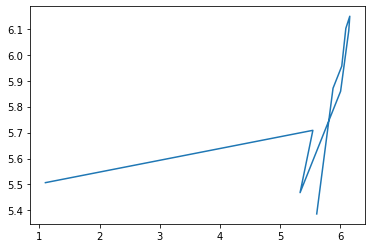

In [68]:
plt.plot(y_test, preds)

In [69]:
regression_results(y_test, preds)

explained_variance:  0.1597
mean_squared_log_error:  0.1283
r2:  0.0761
MAE:  0.5226
MSE:  1.9558
RMSE:  1.3985


## Analysing our results on this small dataset

We tried 4 different approach on two different algorithm :
- split 80/20
- split 80/20, shuffling
- split 80/20, shuffling, log('Price')
- split 80/20, log('Price')

It seems that the best approach on this dataset is to split and shuffle on the LinearRegression and RandomForestRegressor algorithms.

LinearRegression returns the following results :
```
    explained_variance:  0.8489
    mean_squared_log_error:  0.049
    r2:  0.8479
    MAE:  35.1883
    MSE:  2075.54
    RMSE:  45.5581
```

It seems the training was good enough, but maybe a little overfit (high variance).

RandomForestRegressor returns the following results :
```
    explained_variance:  0.7648
    mean_squared_log_error:  0.0013
    r2:  0.7137
    MAE:  0.2215
    MSE:  0.0582
    RMSE:  0.2413
```

It seems the training was good, probably this training did not overfit !

Not mention the dataset is very small so it's purpose is to rapidly analyse but we'll not go too deep on the analysis. This is a first comparision for me.